# **21-Numerical methods**

---

### **Introduction**

This notebook goes over some common numerical methods for first order equations.

---

### **Author**
**Junichi Koganemaru**  

---

### **Last Updated**
**February 8, 2025**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Consider a general first order IVP of the form
$$
\begin{cases}
y'(t) = f(t, y(t)), & t \in I \\
y(t_0) = y_0,
\end{cases}
$$
where $I \subseteq \mathbb{R}$ is an interval, $t_0 \in I$, and $f: I \times \mathbb{R} \to \mathbb{R}$ is assumed to be continuous.

In this notebook we describe a few [numerical methods](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) for generating approximate solutions to first order scalar equations.  

## Euler's method
The simplest numerical method for constructing approximate solutions is **forward Euler's method**. Suppose we are given a step size $h > 0$ and we want to approximate the solution at times $t_0, t_1, \ldots, t_n$ where $t_{i+1} = t_i + h$ for $i = 0, ..., n-1$ and $n \in \mathbb{Z}^+$. The basic idea behind Euler's method is to use a linear approximation at every time step to generate the next approximate solution.

More specifically, Euler's method generates a sequence of values $y_0, y_1, \ldots, y_n$ where $y_0 = y(t_0)$ and
$$
y_{i+1} = y_i + h f(t_i, y_i), \quad i = 0, 1, \ldots, n-1.
$$
This is often referred to as the *forward Euler method* as the approximations are generating by moving forward in time.



> **Example** Consider the IVP
> $$
> \begin{cases}
> y'(t) = t + \frac{1}{5}, & t \in (0, 2) \\
> y(0) = -3.
> \end{cases}
> $$
> In this problem, we have $f: [0,2] \times \mathbb{R} \to \mathbb{R}$ given by $f(t,y) = t + \frac{1}{5}y$.
> We follow Euler's method and compute the approximated values as follows. Suppose we set the step size $h = 0.2$ and want to approximate the solutions up to $t= 1$. Then 
> $$
> t_0 = 0, \quad t_1 = 0.2, \quad t_2 = 0.4, \quad t_3 = 0.6, \quad t_4 = 0.8, \quad t_5 = 1
> $$
> and 
> $$
> \begin{align*}
> y_0 &= y(0) = -3, \\
> y_1 &= y_0 + h f(t_0, y_0) = y_0 + h (t_0 + \frac{1}{5} y_0)= 0 + 0.2 \left(0 + \frac{1}{5}(-3)\right) = -3.12 \\
> y_2 &= y_1 + h f(t_1, y_1) = y_1 + h (t_1 + \frac{1}{5} y_1)= -3.12 + 0.2 \left(0.2 + \frac{1}{5}(-3.12)\right) \approx -3.205 \\
> y_3 &= y_2 + h f(t_2, y_2) = y_2 + h (t_2 + \frac{1}{5} y_2)= -3.205 + 0.2 \left(0.4 + \frac{1}{5}(-3.205)\right) \approx -3.253 \\
> y_4 &= y_3 + h f(t_3, y_3) = y_3 + h (t_3 + \frac{1}{5} y_3)= -3.253 + 0.2 \left(0.6 + \frac{1}{5}(-3.253)\right) \approx -3.263 \\
> y_5 &= y_4 + h f(t_4, y_4) = y_4 + h (t_4 + \frac{1}{5} y_4)= -3.263 + 0.2 \left(0.8 + \frac{1}{5}(-3.263)\right) \approx -3.234.
> \end{align*}
> $$

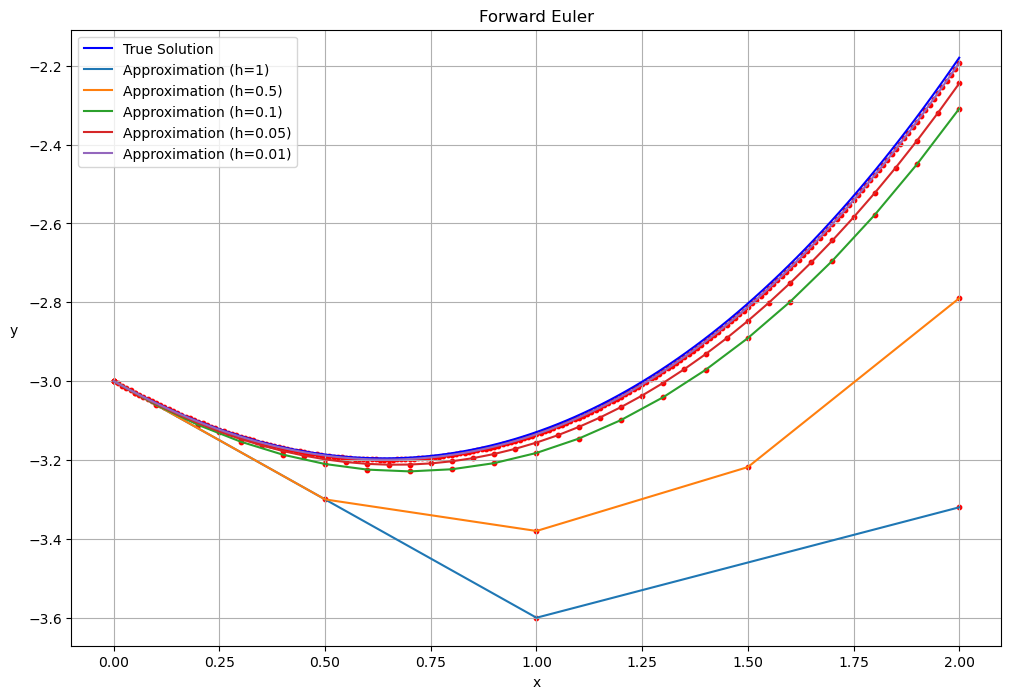

In [ ]:
def f(t, y):    
    return t + (1/5) * y

def true_solution(t):
    return 22 * np.exp(t / 5) - 5 * t - 25

t0 = 0
y0 = -3
t_end = 2  
step_sizes = [1, 0.5, 0.1, 0.05, 0.01] 

t_values = np.linspace(t0, t_end, 100)
true_y_values = true_solution(t_values)

plt.figure(figsize=(12, 8)) 
plt.plot(t_values, true_y_values, label="True Solution", linestyle='-', color='blue')

def forward_euler(f, t0, y0, h, n):
    t_values = [t0]
    y_values = [y0]
    for i in range(n):
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_values[-1], y_values[-1])
        t_values.append(t_next)
        y_values.append(y_next)
    return np.array(t_values), np.array(y_values)

for h in step_sizes:
    n = int((t_end - t0) / h) 
    t_values, y_values = forward_euler(f, t0, y0, h, n)
    plt.plot(t_values, y_values, label=f"Approximation (h={h})")
    plt.scatter(t_values, y_values, color='red', s=10) 

plt.xlabel("t")
plt.ylabel("y", rotation=0, labelpad=10)
plt.title("Forward Euler")
plt.legend()
plt.grid()
plt.show()


### Accuracy, stability, and convergence 

In the previous example, we clearly see that the quality of the approximation depends on the step size $h$. The smaller the step size, the more accurate the approximation. 

For a given numerical scheme, there are several ways to assess the quality of the approximation. In practice, one often analyzes the **accuracy**, **stability**, and **convergence** of the numerical scheme. Here is a brief description of what these terms mean.

* Accuracy is a measure of how well the numerical method approximates the true solution in a single time step. This is captured through analyzing the **local truncation error**, which is defined via 
$$
\text{Local truncation error at} \; t_i = y(t_i) - y_i,
$$ 
where $y: I \to \mathbb{R}$ is the true solution and $y_i$ is the numerical approximation at time $t_i$. The local truncation error is often expressed as a function of the step size $h$ and the order of the method. For example, if the local truncation error is proportional to $h^{p+1}$, then we say that the method is accurate of **order $p$**.

* Stability is a measure of how well the errors are controlled as the numerical scheme progresses over time. Roughly speaking, a numerical method is said to be **stable** if errors do not grow uncontrollably as the method is applied repeatedly. In practice, there are different notions of stability, the most common being the [**A-stability**](https://en.wikipedia.org/wiki/Stiff_equation#A-stability) and [**L-stability**](https://en.wikipedia.org/wiki/L-stability).

* Convergence is a measure of how well the numerical method approximates the true solution as the step size $h$ approaches zero. A numerical method is said to be **convergent** if the local truncation error approaches zero as $h \to 0$. 

For forward Euler, one can show via Taylor's theorem that the local truncation error is proportional to $h^2$, which means that the method is accurate of order 1. Since higher order methods exist in practice, forward Euler is often not used in practice. However, its simplicity makes it easy to implement and to introduce the key ideas in numerical analysis. 

An fundamental result in this field is the **Lax equivalence theorem**, which states that a consistent numerical method is convergent if and only if it is stable. This means that if a numerical method is consistent (i.e., the local truncation error approaches zero as $h \to 0$, which is true if the method is accurate), then it is convergent if and only if it is stable. 

This means that if one wants to prove that a numerical method is convergent, which is a highly desired property, one only needs to show that it is accurate and stable.

### Implicit Euler's method

A variant of Euler's method is the **implicit Euler method**. This method is often used for stiff equations, which are equations that exhibit rapid changes in the solution over a short period of time. The implicit Euler method is more stable than the forward Euler method and can handle larger step sizes without losing accuracy.

The implicit Euler method generates a sequence of values $y_0, y_1, \ldots, y_n$ where $y_0 = y(t_0)$ and
$$
y_{i+1} = y_i + h f(t_{i+1}, y_{i+1}), \quad i = 0, 1, \ldots, n-1.
$$
This is often referred to as the *backward Euler method* as the approximations are in some sense generated by moving backward in time.

The advantage of using the implicit Euler method is that it is more stable than the forward Euler method. However, the implicit Euler method requires solving a nonlinear equation at each time step, which can be computationally expensive.


### Taylor's theorem and big-O notation 

A key tool in analyzing numerical schemes is Taylor's theorem. 


**Theorem (Taylor's theorem in one dimension, remainder form):** Suppose $\mathbb{Z} \ni k \ge 0$ and assume $f$ is $(k+1)$-times differentiable on an open interval $I$ containing some number $x_0$. Then for every $x \in I$, there exists a function $R_k$ such that  
$$
f(x) = f(x_0) + f'(x_0) (x-x_0) + \frac{1}{2} f''(x_0) (x - x_0)^2 + \frac{1}{3!} f^{(3)}(x-x_0)^3  + \cdots +\frac{1}{k!} f^{(k)}(x_0) (x-x_0)^k + R_k(x),
$$
where the remainder $R_k(x)$ can be explicitly written as 
$$
R_k(x) = \frac{1}{(k+1)!} f^{(k+1)} (\xi) (x-x_0)^{k+1}
$$
for some number $\xi$ between $x_0$ and $x$.  

Many authors state Taylor's theorem in terms of the so-called big-O notation. We'll introduce this notation below.  

> **Definition (Big-O notation for sequences):**  
> Suppose $\{y_n\}_{n=1}^\infty$ and $\{z_n\}_{n=1}^\infty$ are two sequences of real numbers. If there exists a constant $c > 0$ and an integer $N$ not depending on $n$ such that  
> $$
> \lvert y_n \rvert \le c \lvert z_n \rvert, \quad \text{for all} \; n \ge N,
> $$
> then we say that the sequence $\{y_n\}$ is of order $\{z_n\}$ as $n \to \infty$, and write  
> $$
> y_n = O(z_n), \quad n \to \infty.
> $$  

We'll also record a slightly more general notion that can be adapted to functions.  

> **Definition (Big-O notation for functions):**  
> Suppose $f,g : I \to \mathbb{R}$ where $I$ is some subset of the real numbers. If there exists a constant $c > 0$ and some $\delta > 0$ such that  
> $$
> \lvert f(x) \rvert \le c \lvert g(x) \rvert, \quad \text{for all} \; x \; \text{such that} \; \lvert x-a \rvert < \delta,
> $$  
> then we say that $f(x)$ is of order $g(x)$ as $x$ goes to $a$ and write  
> $$
> f(x) = O(g(x)) \quad \text{as} \; x \to a.
> $$  

**Remark:**  
We often only write $f(x) = O(g(x))$ when the value of $a$ is clear from context.  

Using this notation, Taylor's theorem then says that  
$$
f(x) = P_k(x) + R_k(x),
$$
where  
$$
P_k(x) = \sum_{j=0}^k \frac{f^{(j)}(x_0)}{j!} (x-x_0)^j
$$
and  
$$
R_k(x) = O(\lvert x-x_0 \rvert^{k+1}), \quad \text{as} \; x \to x_0.
$$  

The following proposition essentially shows why the forward Euler scheme is a first order scheme. 

> **Proposition:**  
> Suppose $f: \mathbb{R} \to \mathbb{R}$ is smooth on an interval $I$. Then we have  
> $$
> \frac{f(x+h) - f(x)}{h} - f'(x) = O(h), \quad h \to 0.
> $$  

**Justification:**  
Suppose $h$ is sufficiently small so that $(x-h,x+h) \subset I$. Then by Taylor's theorem,  
$$
f(x+h) = f(x) + f'(x) h + \frac{f''(\xi)}{2} h^2
$$
for some $\xi \in (x-h, x+h)$. Thus  
$$
\frac{f(x+h) - f(x)} {h} = f'(x) + \frac{f''(\xi)}{2} h.
$$  
Since $f''$ is continuous on the closed interval $[x-\delta,x+\delta]$ for any $\delta > 0$ such that $[x-\delta,x+\delta] \subset I$, by the extreme value theorem there exists some constant $M > 0$ for which  
$$
\lvert f''(x) \rvert \le M, \quad x \in [x - \delta, x+\delta].
$$  
Thus there exists some $\delta > 0$ and some constant $c > 0$ for which  
$$
\lvert \frac{f''(\xi)}{2} h \rvert \le c \lvert h \rvert, \quad \quad \text{for all} \; h \; \text{such that} \; \lvert h \rvert < \delta.
$$  
Thus $\frac{f(x+h) - f(x)}{h} - f'(x) = O(h)$ as $h \to 0$ and the desired conclusion follows.  

Similarly, one can show that for sufficiently small $h$,  
$$
\frac{f(x) - f(x-h)}{h} - f'(x) = O(h), \quad h \to 0
$$  
$$
\frac{f(x+h) - f(x-h)}{2h} - f'(x) = O(h^2), \quad h \to 0
$$  
and  
$$
\frac{f(x+h) - 2f(x) + f(x-h)}{h^2} - f''(x) = O(h^2), \quad h \to 0.
$$  

In general, higher order schemes are constructed by using higher order Taylor expansions. 

## Runge-Kutta methods 

A popular class of higher order methods that are widely used in practice are the **Runge-Kutta methods**. These methods are based on the idea of approximating the solution at each time step by taking a weighted average of the function values at several points.

The most common Runge-Kutta method is the **fourth order Runge-Kutta method**, which generates a sequence of values $y_0, y_1, \ldots, y_n$ where $y_0 = y(t_0)$ and
$$
y_{i+1} = y_i + \frac{h}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right),
$$
where 
$$
\begin{align*}
k_1 &= f(t_i, y_i), \\
k_2 &= f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2} k_1\right), \\
k_3 &= f\left(t_i + \frac{h}{2}, y_i + \frac{h}{2} k_2\right), \\
k_4 &= f(t_i + h, y_i + h k_3), \quad i = 0, 1, \ldots, n-1.
\end{align*}
$$

One can show that under reasonable conditions, the method is stable and accurate of order 4, which means that it is convergent by the Lax equivalence theorem.